In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv'

In [3]:
data = pd.read_csv(url)

In [7]:
data.shape

(106, 19)

In [8]:
data.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


In [9]:
data.columns

Index(['edition', 'start_date', 'winner_name', 'winner_team', 'distance',
       'time_overall', 'time_margin', 'stage_wins', 'stages_led', 'height',
       'weight', 'age', 'born', 'died', 'full_name', 'nickname', 'birth_town',
       'birth_country', 'nationality'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
edition          106 non-null int64
start_date       106 non-null object
winner_name      106 non-null object
winner_team      106 non-null object
distance         106 non-null float64
time_overall     98 non-null float64
time_margin      98 non-null float64
stage_wins       106 non-null int64
stages_led       106 non-null int64
height           66 non-null float64
weight           67 non-null float64
age              106 non-null int64
born             106 non-null object
died             56 non-null object
full_name        46 non-null object
nickname         74 non-null object
birth_town       106 non-null object
birth_country    106 non-null object
nationality      106 non-null object
dtypes: float64(5), int64(4), object(10)
memory usage: 15.8+ KB


In [11]:
data.loc[data.duplicated()]

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality


# Winning time and how far the runner up is for every edition

In [12]:
winning = data[['edition','time_overall','time_margin']].copy()

In [13]:
winning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
edition         106 non-null int64
time_overall    98 non-null float64
time_margin     98 non-null float64
dtypes: float64(2), int64(1)
memory usage: 2.6 KB


In [15]:
info = pd.notnull(winning['time_overall'])
winning[info].head()

,edition,time_overall,time_margin
0,1,94.553889,2.989167
1,2,96.098611,2.270556
10,11,197.900000,0.135556
11,12,200.480000,0.016944
12,13,231.120833,1.715000


Seems we had missing data from the 3rd to 10th edition

In [16]:
df = winning[info]

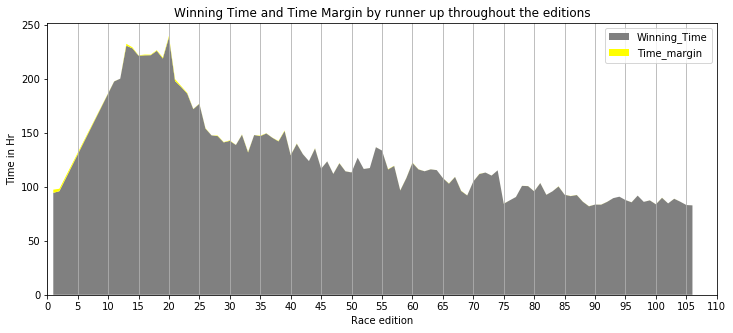

In [17]:
fig,ax = plt.subplots(figsize=(12,5))
ax.stackplot(df['edition'],df['time_overall'],df['time_margin'],colors=['gray','yellow'])
ax.set_xlim(0,110)
ax.grid(axis='x')
ax.locator_params(axis='x',nbins=22)
plt.title('Winning Time and Time Margin by runner up throughout the editions')
plt.xlabel('Race edition')
plt.ylabel('Time in Hr')
plt.legend(['Winning_Time','Time_margin'],loc='upper right')
fig

The general trend seems to show the winning time reducing throughput the entirity of the period, but evening out at about the 90th edition henceforth.

We notice a huge increase in time taken between the 1st and 15th edition region. We retain a fairly constant duration till the 20th edition when a sharp fall is notice followed by a fairly uniform decrease henceforth. Let's investigate this.

In [18]:
data.loc[1:15]

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France
5,6,1908-07-13,Lucien Petit-Breton,Peugeot–Wolber,4497.0,NaN,NaN,5,13,NaN,NaN,25,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France
6,7,1909-07-05,François Faber,Alcyon–Dunlop,4498.0,NaN,NaN,6,13,1.78,88.0,22,1887-01-26,1915-05-09,NaN,The giant of colombes,Aulnay-sur-Iton,France,Luxembourg
7,8,1910-07-01,Octave Lapize,Alcyon–Dunlop,4734.0,NaN,NaN,4,3,NaN,NaN,22,1887-10-24,1917-07-14,NaN,NaN,Paris,France,France
8,9,1911-07-02,Gustave Garrigou,Alcyon–Dunlop,5343.0,NaN,NaN,2,13,NaN,NaN,26,1884-09-24,1963-01-28,Cyprien Gustave Garrigou,NaN,Vabres,France,France
9,10,1912-06-30,Odile Defraye,Alcyon–Dunlop,5289.0,NaN,NaN,3,13,NaN,NaN,23,1888-07-14,1965-08-21,NaN,NaN,Rumbeke,Belgium,Belgium
10,11,1913-06-29,Philippe Thys,Peugeot–Wolber,5287.0,197.900000,0.135556,1,8,NaN,NaN,23,1889-10-08,1971-01-16,NaN,Le basset (The Basset Hound),Anderlecht,Belgium,Belgium


Despite missing data from the 2nd to 9th edition, the distance covered by the seems to have nearly doubled from the first two editions from 2428 to around 5200. This explains the steep rise in time taken between the periods given more than twice the distance had to be covered.

In [19]:
data.loc[15:20]['distance'].mean()

5461.5

In [38]:
data.loc[15:20]

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality,year
15,16,1922-06-25,Firmin Lambot,Peugeot–Wolber,5375.0,222.135000,0.694722,0,3,NaN,NaN,36,1886-03-14,1964-01-19,NaN,NaN,Florennes,Belgium,Belgium,1922
16,17,1923-06-24,Henri Pélissier,Automoto–Hutchinson,5386.0,222.258333,0.508333,3,6,NaN,NaN,34,1889-01-22,1935-05-01,NaN,NaN,Paris,France,France,1923
17,18,1924-06-22,Ottavio Bottecchia,Automoto,5425.0,226.305833,0.593056,4,15,NaN,NaN,29,1894-08-01,1927-06-15,NaN,NaN,San Martino di Colle Umberto,Italy,Italy,1924
18,19,1925-06-21,Ottavio Bottecchia,Automoto–Hutchinson,5440.0,219.171667,0.915000,4,13,NaN,NaN,30,1894-08-01,1927-06-15,NaN,NaN,San Martino di Colle Umberto,Italy,Italy,1925
19,20,1926-06-20,Lucien Buysse,Automoto–Hutchinson,5745.0,238.740278,1.373611,2,8,NaN,NaN,33,1892-09-11,1980-01-03,NaN,NaN,Wontergem,Belgium,Belgium,1926
20,21,1927-06-19,Nicolas Frantz,Alcyon–Dunlop,5398.0,198.278333,1.811389,3,14,NaN,NaN,27,1899-11-04,1985-11-08,NaN,NaN,Mamer,Luxembourg,Luxembourg,1927


The winning time between these period remains fairly constant given the distance remained fairly constant as well , averaging about 5460.

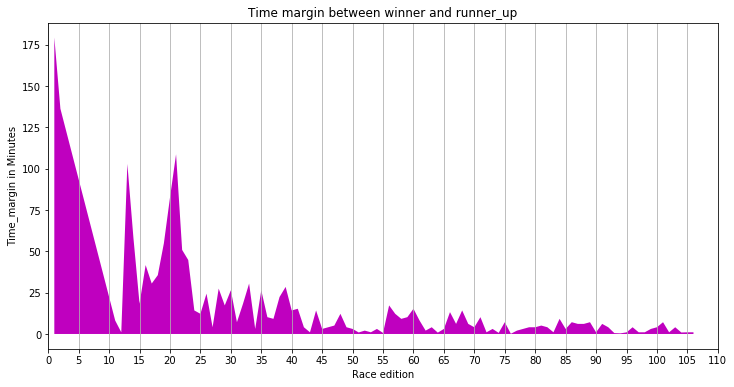

In [21]:
fig,ax = plt.subplots(figsize=(12,6))
ax.stackplot(df['edition'],(df['time_margin']*60),colors='m')
ax.grid(axis='x')
ax.set_xlim(0,110)
ax.locator_params(axis='x',nbins=22)
plt.title('Time margin between winner and runner_up')
plt.xlabel('Race edition')
plt.ylabel('Time_margin in Minutes')
fig

Generally the time margin seems to be have reduced over the entire period, getting to an almost uniform distribution from around the 70th edition.

# Winners per stage boxplot

In [23]:
data.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


In [24]:
data['stage_wins'].value_counts()

2    26
1    22
3    17
4    15
5     9
0     8
6     5
8     2
7     2
Name: stage_wins, dtype: int64

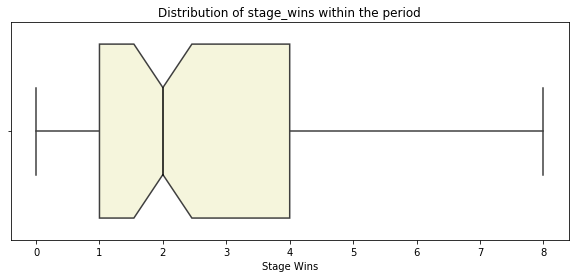

In [45]:
fig,ax = plt.subplots(figsize=(10,4))
ax = sns.boxplot(data['stage_wins'],orient='h',notch=True,
                boxprops={'facecolor':'beige'},medianprops={'color':'black'})
plt.xlabel('Stage Wins')
plt.title('Distribution of stage_wins within the period')
fig

The boxplot shows that majority of the winners won the 1st to 4th stages of the race, with the majority winning the 2nd stage.

# Relationship between winner's age and no. of stages led

In [46]:
data.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality,year
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France,1903
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France,1904
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France,1905
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France,1906
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France,1907


In [47]:
data.groupby('age')[['stages_led']].sum()

,stages_led
age,
19,3
22,63
23,66
24,69
25,60
26,142
27,126
28,133
29,135


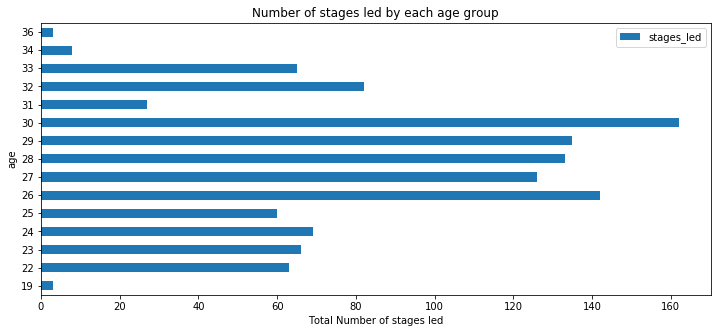

In [52]:
ax = data.groupby('age')[['stages_led']].sum().plot(kind='barh',figsize=(12,5),title='Number of stages led by each age group')
ax.set_xlabel('Total Number of stages led')
plt.show()

This shows us that the majority stages_led are by cyclists aged 30,with the age group (26-30) proving to be the dominant age for stages led.
Seems to be a the perfect balance of 'youth' and 'experience'!

# Sorting by the most recent winning and displaying their nationality

In [53]:
data['start_date'].dtype

dtype('<M8[ns]')

In [54]:
data[['start_date','born','died']] = data[['start_date','born','died']].apply(pd.to_datetime)

In [55]:
import datetime
data['year'] = data['start_date'].astype('object').dt.year
data['year'].dtype

dtype('int64')

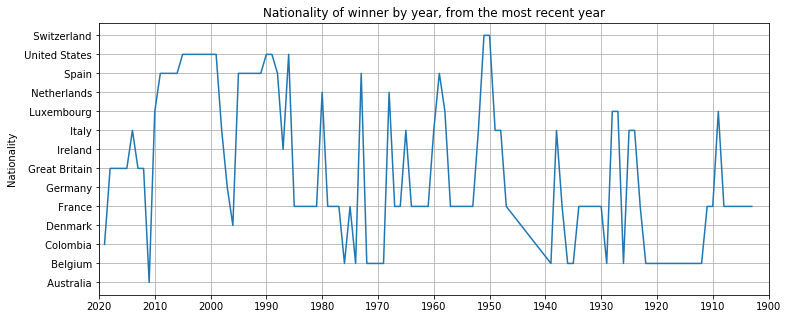

In [57]:
fig,ax = plt.subplots(figsize=(12,5))
ax.plot(data['year'],data['nationality'])
plt.title('Nationality of winner by year, from the most recent year')
ax.set_ylabel('Nationality')
ax.set_xlim(2020,1900)
ax.grid(True)
ax.locator_params(axis='x',nbins=12)
fig

Despite the nationality bouncing from one to the other, periodic dominances are witnessed by: United States: 1999-2006, France: 1981-1985 , and again in the mid 1950s. Not forgetting Belgium : about a decade between 1910 - 1920.